In [ ]:
!pip install skforecast
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_squared_error
from pmdarima import auto_arima

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
import pandas as pd
from skforecast.utils import load_forecaster
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00


# **Generando datos de prueba y testeo**

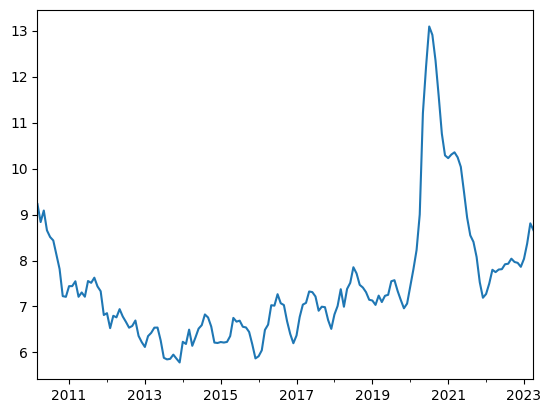

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import io
from google.colab import files
#uploaded1 = files.upload()
#data = pd.read_csv(io.BytesIO(uploaded1['Datos_imputados_data.csv']))
data = pd.read_csv("Datos_imputados_data.csv")
data = data.set_index((pd.to_datetime(data["Fecha"])))

data['Tasa de desocupación '].plot()
#data[123:-18]["Tasa de desocupación "] = data[123:-18]["Tasa de desocupación "].mean()
serie = data['Tasa de desocupación '][:-3]


In [ ]:
data

,Tasa de desocupación,Índice de Producción Industrial1/Ref/P,"Imacec empalmado, serie original (índice 2018=100)","Imacec empalmado, desestacionalizado (índice 2018=100)",Índice de Actividad del Comercio al por Menor empalmado1/Ref/P/R,Superficie total1/P,Circulante,Circulante Series Desestancionalizada,M1,M1 Series Desestancionalizada,...,Colocaciones 90 a 365 Dias Reaj. U.F.,Índice IPC,Índice IPP,1.IPSA (índice enero 2003=1000),1.Tipo de cambio nominal (dólar observado $/USD),Índice Real de Remuneraciones,1.Índice de Avisos Laborales de Internet,Price_Copper,Price_oil_brent,Price_oil_WTI
2010-03-01,9.227598,85.890692,75.714061,72.188457,68.714934,864997.0,1766.038509,1757.496963,8741.538305,8757.077545,...,1.14,76.74,NaN,3763.12,523.162609,76.77,NaN,3.5630,82.70,83.76
2010-04-01,8.836054,89.314768,77.836154,76.391108,70.827523,1255511.0,1787.177125,1782.396700,8777.076194,8766.860632,...,1.06,77.09,NaN,3865.45,520.624286,77.11,NaN,3.3535,87.44,86.15
2010-05-01,9.087731,88.300745,77.265080,75.986478,74.397481,1006538.0,1818.742650,1806.376664,9164.686935,9006.253420,...,2.18,77.37,NaN,3886.86,533.206500,77.21,NaN,3.1150,74.65,73.97
2010-06-01,8.656064,90.273453,76.186444,76.741980,68.982975,922225.0,1835.405029,1830.140426,9345.082200,9179.317366,...,2.62,77.37,NaN,4065.29,536.668095,77.34,NaN,2.9505,75.01,75.63
2010-07-01,8.511179,91.268547,74.112635,77.927981,72.390415,1244177.0,1821.948366,1844.402644,9181.959429,9285.182716,...,2.02,77.87,NaN,4364.15,531.721429,77.38,NaN,3.3200,78.18,78.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,7.862749,107.231675,118.712749,107.107292,165.095194,2210659.0,4290.059349,4249.870867,21280.621947,20871.999600,...,6.17,129.02,175.28,5261.91,875.661429,94.81,56.14,3.8105,85.91,80.47
2023-01-01,8.037244,98.113393,104.478242,108.819661,119.497609,584241.0,4158.297493,4175.849980,20764.152682,20610.806694,...,7.03,130.05,173.20,5322.39,826.335714,96.07,58.02,4.2260,84.49,80.11
2023-02-01,8.367641,90.694325,99.568962,108.452333,114.836584,525553.0,4093.059416,4105.747625,20433.551122,20476.112918,...,7.07,129.97,172.33,5394.90,798.257500,95.97,49.30,4.0740,83.45,77.05
2023-03-01,8.808479,103.055682,NaN,NaN,130.872603,789924.0,3980.190933,4038.420136,20114.918673,20305.817566,...,7.33,131.38,174.33,5324.62,809.503913,NaN,53.79,4.0945,79.77,75.67


# **LSTM**

No utilizar todavía

In [ ]:

#a.) convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
  names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
  if i == 0:
   names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
  else:
   names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = pd.concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg
 
#b.) create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
  value = dataset[i] - dataset[i - interval]
  diff.append(value)
 return pd.Series(diff)
 
#c.) transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
 # extract raw values
 raw_values = series.values
 # transform data to be stationary
 diff_series = difference(raw_values, 1)
 diff_values = diff_series.values
 diff_values = diff_values.reshape(len(diff_values), 1)
 # rescale values to -1, 1
 scaler = MinMaxScaler(feature_range=(0, 1))
 scaled_values = scaler.fit_transform(diff_values)
 scaled_values = scaled_values.reshape(len(scaled_values), 1)
 # transform into supervised learning problem X, y
 supervised = series_to_supervised(scaled_values, n_lag, n_seq)
 supervised_values = supervised.values
 # split into train and test sets
 from sklearn.model_selection import train_test_split
 train, test = train_test_split(supervised_values,test_size=0.2)
 return scaler, train, test
 
#d.) Define the LSTM network 
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
 # reshape training into [samples, timesteps, features]
 X, y = train[:, 0:n_lag], train[:, n_lag:]
 X = X.reshape(X.shape[0], 1, X.shape[1])
 # design network
 model = Sequential()
 model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
 model.add(Dense(y.shape[1]))
 model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])
 # fit network
 for i in range(nb_epoch):
  model.fit(X, y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
  model.reset_states()
 return model
 
#e.) forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
 # reshape input pattern to [samples, timesteps, features]
 X = X.reshape(1, 1, len(X))
 # make forecast
 forecast = model.predict(X, batch_size=n_batch)
 # convert to array
 return [x for x in forecast[0, :]]
 
#f.)  evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
 forecasts = list()
 for i in range(len(test)):
  X, y = test[i, 0:n_lag], test[i, n_lag:]
  # make forecast
  forecast = forecast_lstm(model, X, n_batch)
  # store the forecast
  forecasts.append(forecast)
 return forecasts
 
#g.) invert differenced forecast
def inverse_difference(last_ob, forecast):
 # invert first forecast
 inverted = list()
 inverted.append(forecast[0] + last_ob)
 # propagate difference forecast using inverted first value
 for i in range(1, len(forecast)):
  inverted.append(forecast[i] + inverted[i-1])
 return inverted
 
#h.) inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
 inverted = list()
 for i in range(len(forecasts)):
  # create array from forecast
  forecast = array(forecasts[i])
  forecast = forecast.reshape(1, len(forecast))
  # invert scaling
  inv_scale = scaler.inverse_transform(forecast)
  inv_scale = inv_scale[0, :]
  # invert differencing
  index = len(series) - n_test + i - 2
  last_ob = series.values[index]
  inv_diff = inverse_difference(last_ob, inv_scale)
  # store
  inverted.append(inv_diff)
 return inverted
 
#i.) evaluate the model with RMSE 
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
 for i in range(n_seq):
  actual = [row[i] for row in test]
  predicted = [forecast[i] for forecast in forecasts]
  rmse = sqrt(mean_squared_error(actual, predicted))
  print('t+%d RMSE: %f' % ((i+1), rmse))
 
#j.) plot the forecasts
def plot_forecasts(series, forecasts, n_test):
 # plot the en[tire dataset in blue
 pyplot.plot(series.values)
 # plot the forecasts in red
 for i in [0]:
  off_s = len(series) - n_test + i - 1
  off_e = off_s + len(forecasts[i]) + 1
  xaxis = [x for x in range(off_s, off_e)]
  yaxis = [series.values[off_s]] + forecasts[i]
  pyplot.plot(xaxis, yaxis, color='red')
 # show the plot
 pyplot.show()
# load the dataset
series = pd.read_csv('Datos_imputados_data.csv')["Tasa de desocupación "]
series = pd.DataFrame(series)
# configure
n_lag = 100
n_seq = len(X_test)
n_test = len(X_test)
n_epochs = 500
n_batch = 1
n_neurons = 50
#prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
#fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
#forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
#inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test)
#evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)

plot_forecasts(series, forecasts, n_test)

# **ForecasterAutoreg**

*   Datos de entrenamiento modelo= 80%
*   Datos Test = 20%.

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:791: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:791: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:854: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


R^2: -13.358598157134919
RMSE: 0.6938668169993852
MSE: 0.4814511597328583


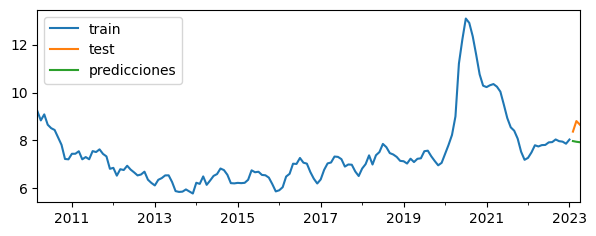

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(),
                lags = 3
             )

forecaster.fit(y=serie)

steps = 3
predicciones = forecaster.predict(steps=steps)
predicciones.index = data["Tasa de desocupación "][-3:].index

# Calcular R^2
r2 = r2_score(data["Tasa de desocupación "][-3:], predicciones)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(data["Tasa de desocupación "][-3:], predicciones))

# Calcular MSE
mse = mean_squared_error(data["Tasa de desocupación "][-3:], predicciones)

print("R^2:", r2)
print("RMSE:", rmse)
print("MSE:", mse)

fig, ax = plt.subplots(figsize=(7, 2.5))
serie.plot(ax=ax, label='train')
data["Tasa de desocupación "][-3:].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

# **Sarima**

*   Datos para busqueda de parametros = 100%
*   Datos de entrenamiento modelo= 80%
*   Datos Test = 20%.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


R^2: -3.5796655112173728
RMSE: 0.3918654529074134
MSE: 0.15355853318233226


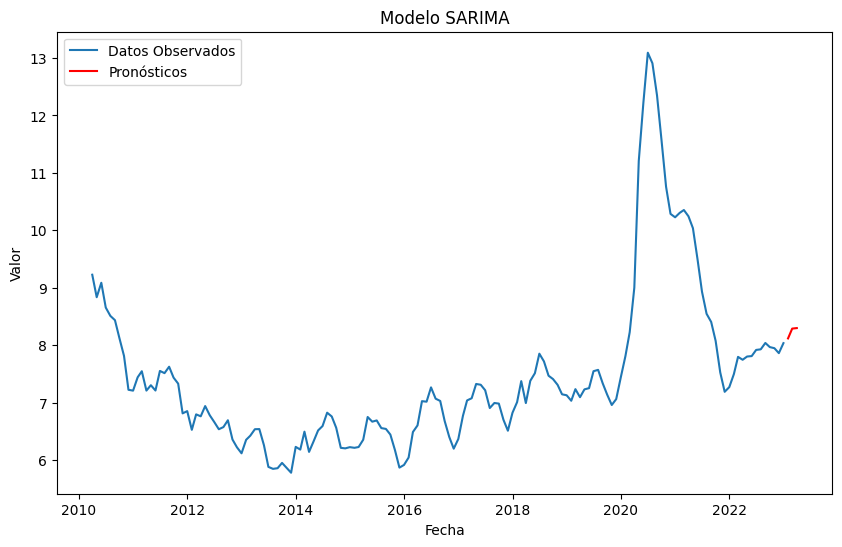

In [ ]:

train = serie

model = auto_arima(serie, seasonal=True, m=12)

# Obtener los mejores parámetros encontrados
order = model.order
seasonal_order = model.seasonal_order

# Crear el modelo SARIMA con los mejores parámetros encontrados
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)

# Ajustar el modelo a los datos
sarima_model_fit = sarima_model.fit()

# Realizar pronósticos
forecast = sarima_model_fit.get_forecast(steps=len(data["Tasa de desocupación "][-3:]))

# Obtener los valores pronosticados y los intervalos de confianza
forecast_values = forecast.predicted_mean



# Calcular R^2
r2 = r2_score(data["Tasa de desocupación "][-3:], forecast_values)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(data["Tasa de desocupación "][-3:], forecast_values))

# Calcular MSE
mse = mean_squared_error(data["Tasa de desocupación "][-3:], forecast_values)

print("R^2:", r2)
print("RMSE:", rmse)
print("MSE:", mse)

# Graficar los datos observados y los pronósticos
plt.figure(figsize=(10, 6))
plt.plot(serie.index, serie, label='Datos Observados')
plt.plot(forecast_values.index, forecast_values, color='red', label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Modelo SARIMA')
plt.legend()
plt.show()






In [ ]:
print(data["Tasa de desocupación "][-3:])
print(forecast_values)

Fecha
2023-01-31    8.367641
2023-02-28    8.808479
2023-03-31    8.659709
Name: Tasa de desocupación , dtype: float64
2023-01-31    8.119298
2023-02-28    8.289953
2023-03-31    8.298970
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
forecast_values

2023-01-31    8.119298
2023-02-28    8.289953
2023-03-31    8.298970
Freq: M, Name: predicted_mean, dtype: float64

# **Prophet**


*   Datos de entrenamiento = 80%
*   Datos Test = 20%.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjp5jhjsi/dm78b16t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjp5jhjsi/zkf3p_ai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85791', 'data', 'file=/tmp/tmpjp5jhjsi/dm78b16t.json', 'init=/tmp/tmpjp5jhjsi/zkf3p_ai.json', 'output', 'file=/tmp/tmpjp5jhjsi/prophet_modeluwdt4s1i/prophet_model-20230605230906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:09:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:09:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


R^2: -144.17011906472285
RMSE: 2.206270278065473
MSE: 4.867628539875099


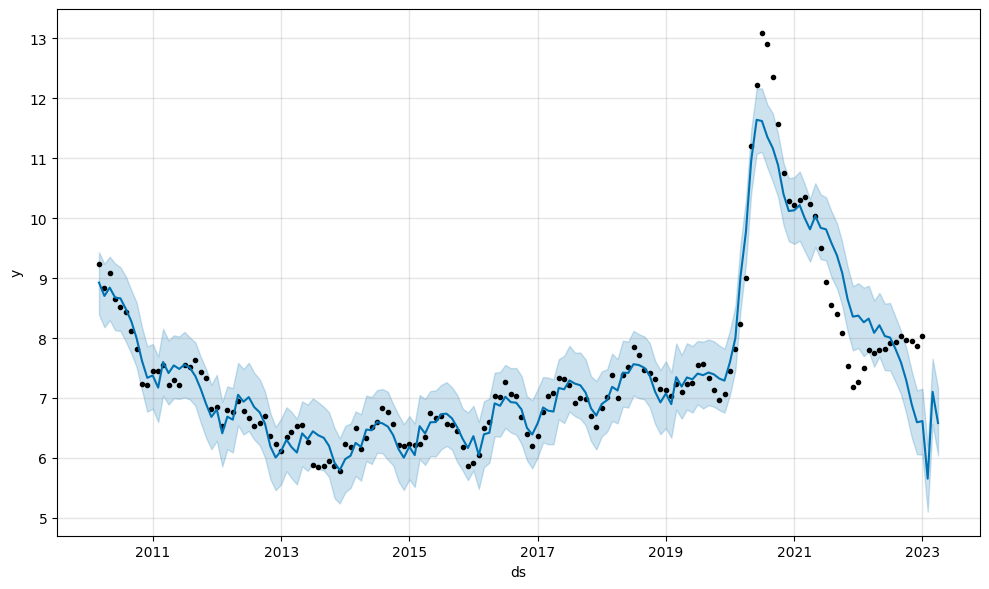

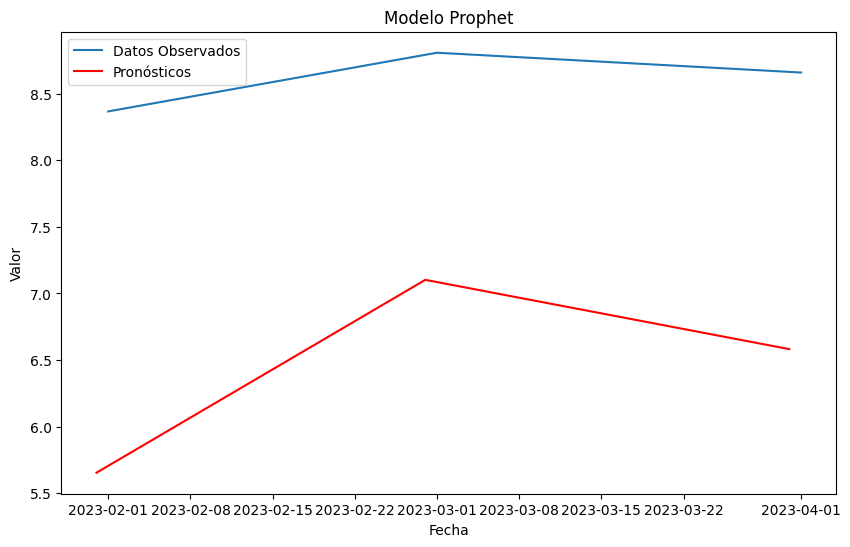

In [ ]:


# Crear y ajustar el modelo Prophet
model = Prophet(changepoint_prior_scale= .8)
train_df = pd.DataFrame(data=[serie.index,serie.values]).T.rename(columns = {0:"ds",1:"y"})

model.fit(train_df)

# Crear un dataframe con las fechas futuras para hacer las predicciones
future = model.make_future_dataframe(periods=len(data["Tasa de desocupación "][-3:]), freq='M')

# Realizar las predicciones
forecast = model.predict(future)

# Visualizar las predicciones
model.plot(forecast)

# Calcular R^2
r2 = r2_score(data["Tasa de desocupación "][-3:], forecast.yhat.values[-3:])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(data["Tasa de desocupación "][-3:], forecast.yhat.values[-3:]))

# Calcular MSE
mse = mean_squared_error(data["Tasa de desocupación "][-3:], forecast.yhat.values[-3:])

print("R^2:", r2)
print("RMSE:", rmse)
print("MSE:", mse)


# Graficar los datos observados y los pronósticos
plt.figure(figsize=(10, 6))
plt.plot(data["Tasa de desocupación "][-3:].index, data["Tasa de desocupación "][-3:], label='Datos Observados')
plt.plot(forecast.ds.values[-3:], forecast.yhat[-3:], color='red', label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Modelo Prophet')
plt.legend()
plt.show()


In [ ]:
forecast.yhat[-3:]

154    7.419111
155    7.972277
156    7.822897
Name: yhat, dtype: float64

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjp5jhjsi/tg_xuo8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjp5jhjsi/7nvvdfkl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3192', 'data', 'file=/tmp/tmpjp5jhjsi/tg_xuo8q.json', 'init=/tmp/tmpjp5jhjsi/7nvvdfkl.json', 'output', 'file=/tmp/tmpjp5jhjsi/prophet_modelswhku710/prophet_model-20230605230759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:07:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:07:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


R^2: -1.051126489173123
RMSE: 2.41052048712416
MSE: 5.810609018845298


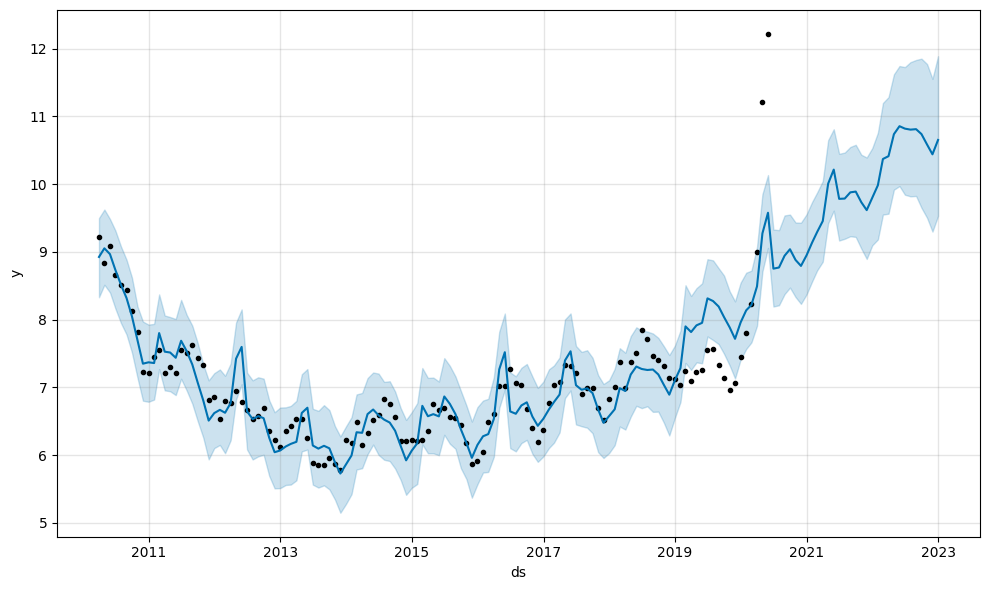

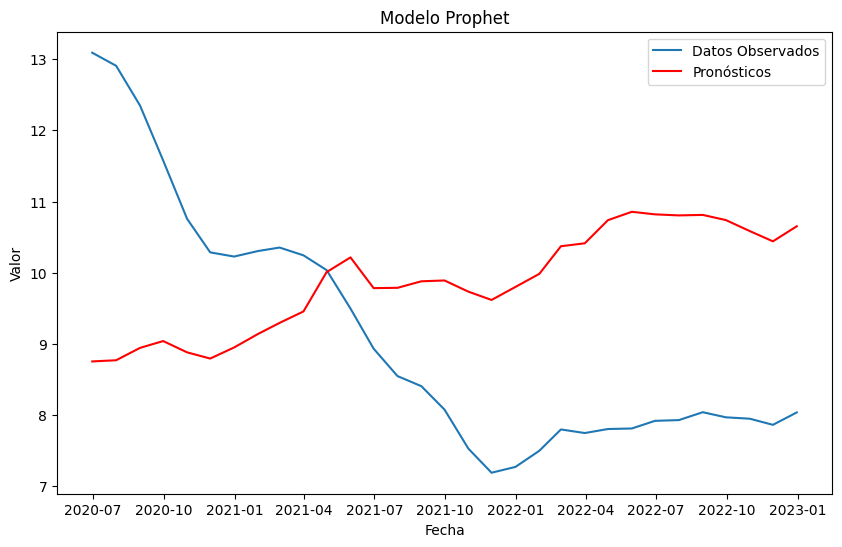

In [ ]:

# Crear y ajustar el modelo Prophet
model = Prophet(changepoint_prior_scale= 1)
train_df = pd.DataFrame(data=[X_train.index,X_train.values]).T.rename(columns = {0:"ds",1:"y"})

model.fit(train_df)

# Crear un dataframe con las fechas futuras para hacer las predicciones
future = model.make_future_dataframe(periods=len(X_test), freq='M')

# Realizar las predicciones
forecast = model.predict(future)

# Visualizar las predicciones
model.plot(forecast)

# Calcular R^2
r2 = r2_score(X_test, forecast.yhat.values[-len(X_test):])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(X_test, forecast.yhat.values[-len(X_test):]))

# Calcular MSE
mse = mean_squared_error(X_test, forecast.yhat.values[-len(X_test):])

print("R^2:", r2)
print("RMSE:", rmse)
print("MSE:", mse)


# Graficar los datos observados y los pronósticos
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, X_test, label='Datos Observados')
plt.plot(forecast.ds.values[-len(X_test):], forecast.yhat.values[-len(X_test):], color='red', label='Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Modelo Prophet')
plt.legend()
plt.show()


<ipython-input-7-2f86e7ac02b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[123:-18]["Tasa de desocupación "] = data[123:-18]["Tasa de desocupación "].mean()
